---
title: "pandas处理什么样的数据"
format:
  html:
  #  code-fold: true
   code-tools: true
jupyter: python3
---

<!-- ## Pandas 处理什么样的数据？ {.unnumbered} -->
大家在前面可能已经学习了Python的大概用法，但是那些各种各样的数据该怎么用Python来处理呢？或者说Python跟其他像 Exccel，或者SQL、JAVA、R这些语言，在数据处理方面又有什么不同呢？

首先这个Pandas是Python的一个库，专门用于数据处理和分析。它提供了高性能、灵活和易于使用的数据结构，包括数据导入、清洗、转换、分析和可视化，是非常适用于处理结构化和表格化的数据。Pandas在数据科学、金融分析、商业智能等领域得到广泛应用。对于不同的数据结构下面进行举例（附上相关案例链接）

<!-- ::: {.callout-tip}
一个免费的[Python在线编辑器](https://onecompiler.com/python)，别等啦！快打开来试试✌️
::: -->

![](./img/pandas概述.png)

## 表格数据
Pandas最常用于处理表格数据，例如CSV文件、Excel文件、数据库查询结果等。你可以使用Pandas读取这些数据，并对其进行各种操作，如过滤、排序、合并、聚合、计算统计指标等。

当使用Pandas处理表格数据时，你可以使用DataFrame这个主要的数据结构。DataFrame是一个二维的标记数组，类似于电子表格或SQL表。

In [1]:
# 1. 导入pandas包
import pandas as pd

# 2. 假设data数据
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

# 3. 假设df，然后调用pd(pandas包)，将数据转换为DataFrame格式
df = pd.DataFrame(data)

# 4. 打印df
df

,calories,duration
0,420,50
1,380,40
2,390,45


## 时间序列数据
Pandas提供了强大的时间序列功能，可以处理日期和时间相关的数据。你可以使用Pandas对时间序列数据进行重采样、滚动计算、时间窗口分析、时间序列绘图等操作。


In [2]:
import pandas as pd

date = pd.to_datetime("13th of June, 2023")

date

Timestamp('2023-06-13 00:00:00')

可以使用DateTimeIndex和TimedeltaIndex来表示时间索引和时间间隔。

In [3]:
import pandas as pd
# 创建一个包含日期范围的时间索引
date_range = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')

# 创建一个DataFrame，并使用时间索引
data = pd.DataFrame({'Value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, index=date_range)

# 查看数据的前几行
data.head()

,Value
2023-01-01,10
2023-01-02,20
2023-01-03,30
2023-01-04,40
2023-01-05,50


选取所需的时间序列数据，并进行计算

In [ ]:
# 通过日期索引获取某一天的数据
day_data = data.loc['2023-01-05']

# 通过日期范围索引获取一段时间内的数据
range_data = data.loc['2023-01-03':'2023-01-07']

# 使用日期的年、月、日等属性进行切片
year_data = data[data.index.year == 2023]
month_data = data[data.index.month == 1]
day_data = data[data.index.day == 5]

# 将数据按周进行重采样，计算每周的平均值
weekly_data = data.resample('W').mean()

# 将数据按月进行重采样，计算每月的总和
monthly_data = data.resample('M').sum()

## 缺失数据处理
Pandas提供了灵活的方法来处理缺失数据。你可以使用Pandas来检测和处理缺失值，填充缺失数据，或者根据缺失值进行数据筛选和计算。

In [4]:
# 创建带有缺失数据的DataFrame
data = pd.DataFrame({'A': [1, 2, None, 4, 5],
                     'B': [None, 2, 3, None, 6],

                     'C': [1, 2, 3, 4, 5]})

检查并统计缺失值

In [ ]:
# 检测每个单元格是否为缺失值
missing_values = data.isnull()

# 统计每列的缺失值数量
missing_counts = data.isnull().sum()

# 统计整个DataFrame的缺失值数量
total_missing_count = data.isnull().sum().sum()

对缺失值进行操作

In [ ]:
# 删除包含缺失值的行
data_dropna = data.dropna()

# 删除全部为缺失值的列
data_dropna_cols = data.dropna(axis=1, how='all')

# 填充缺失值为指定的常数
data_fillna = data.fillna(0)

# 使用缺失值前面的值进行前向填充
data_ffill = data.fillna(method='ffill')

# 使用缺失值后面的值进行后向填充
data_bfill = data.fillna(method='bfill')


## 数据清洗和转换
Pandas可以用于数据清洗和转换的各种操作。你可以使用Pandas对数据进行重塑、合并、分组、变形等，以满足特定的分析需求。


In [ ]:
# 创建原始数据
data = pd.DataFrame({'Name': ['John', 'Emily', 'Michael', 'Emma'],
                     'Age': [25, 30, 35, 28],
                     'Gender': ['M', 'F', 'M', 'F'],
                     'Salary': ['$5000', '$6000', '$4500', '$7000']})

### 数据清洗
清洗重复或者多余数据

In [ ]:
# 去除重复的行
data_cleaned = data.drop_duplicates()

# 去除列中的空格
data_cleaned['Name'] = data_cleaned['Name'].str.strip()

# 删除缺失值所在的行
data_cleaned = data_cleaned.dropna()


### 数据转换
将列表转换为序列（Series）

```series = pd.Series(list)```

In [12]:
import pandas as pd

# 将列表转换为序列
my_list = [1, 2, 3, 4, 5]
series = pd.Series(my_list)
series

0    1
1    2
2    3
3    4
4    5
dtype: int64

将序列（Series）转换为数据框（DataFrame）

```dataframe = series.to_frame()```

In [7]:
# 将序列转换为数据框
series = pd.Series([1, 2, 3, 4, 5])
dataframe = series.to_frame()
dataframe

,0
0,1
1,2
2,3
3,4
4,5


将数据框（DataFrame）转换为列表（list）

```my_list = df.values.tolist()```

In [13]:
# 将数据框转换为列表
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
my_list = df.values.tolist()
my_list

[[1, 4], [2, 5], [3, 6]]

::: {.callout-tip}
数据的清洗和转换是pandas最常使用的功能，之后我们会逐步拆解，进行详细说明
:::

## 数据可视化
Pandas集成了Matplotlib库，可以通过简单的接口生成各种统计图表和可视化图形，以便更好地理解和呈现数据。


<Axes: xlabel='Month'>

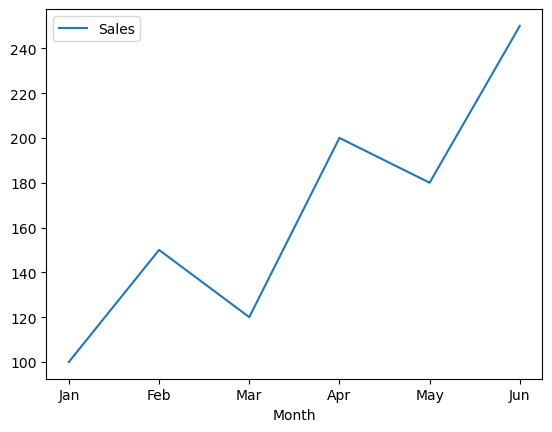

In [14]:
# 创建数据
data = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
                     'Sales': [100, 150, 120, 200, 180, 250],
                     'Expenses': [80, 90, 100, 85, 95, 110]})

# 折线图
data.plot(x='Month', y='Sales', kind='line')


::: {.callout-tip}
虽然pandas也可以画图，但是还是静态图形，之后我们会详细说明更加简洁和酷炫的可视化库 [Plotly库](https://plotly.com/python/)
:::

## 数据建模和分析
Pandas还支持数据建模和分析的操作。你可以使用Pandas进行数据建模、特征工程、数据预处理等，然后将数据传递给机器学习库（如Scikit-learn）进行模型训练和预测。网上看到不错的[数据预测案例](https://developer.aliyun.com/article/1194015)